In [1]:
# 4D画像の可視化ツール
# img4D = [t, z, r, c]
# img3D = [z, r, c]
# img2D = [r, c]
# 2~4D画像全てで同じUI

def viewer4D(img):
    # Notebook内・インタラクティブモード
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from ipywidgets import Play, IntSlider, jslink, HBox, VBox, interactive_output
    
    def show_img(z, t):
        if img.ndim==4:
            ax1.cla()
            ax1.imshow(img[t,z,:,:])
        elif img.ndim==3:
            ax1.cla()
            ax1.imshow(img[z,:,:])
        elif img.ndim==2:
            ax1.cla()
            ax1.imshow(img)
            
    # Figureの初期化, Axesを追加
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    # range
    if img.ndim==4:
        # T1
        playT = Play(value=1, min=0, max=img.shape[0]-1, step=1, interval=500, description="T")
        sliderT = IntSlider(min=0, max=img.shape[0]-1, description="T")
        jslink((playT, 'value'), (sliderT, 'value'))
        # Z1
        playZ = Play(value=1, min=0, max=img.shape[1]-1, step=1, interval=500, description="Z")
        sliderZ = IntSlider(min=0, max=img.shape[1]-1, description="Z")
        jslink((playZ, 'value'), (sliderZ, 'value'))
        # 連結1
        hboxT = HBox([sliderT, playT])
        hboxZ = HBox([sliderZ, playZ])
        ui = VBox([hboxT, hboxZ])
    elif img.ndim==3:
        # T1
        playT = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT = IntSlider(min=0, max=0, description="T")
        jslink((playT, 'value'), (sliderT, 'value'))
        # Z1
        playZ = Play(value=1, min=0, max=img.shape[0]-1, step=1, interval=500, description="Z")
        sliderZ = IntSlider(min=0, max=img.shape[0]-1, description="Z")
        jslink((playZ, 'value'), (sliderZ, 'value'))
        # 連結1
        hboxT = HBox([sliderT, playT])
        hboxZ = HBox([sliderZ, playZ])
        ui = VBox([hboxT, hboxZ])
    elif img.ndim==2:
        # T1
        playT = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT = IntSlider(min=0, max=0, description="T")
        jslink((playT, 'value'), (sliderT, 'value'))
        # Z1
        playZ = Play(value=1, min=0, max=0, step=1, interval=500, description="Z")
        sliderZ = IntSlider(min=0, max=0, description="Z")
        jslink((playZ, 'value'), (sliderZ, 'value'))
        # 連結1
        hboxT = HBox([sliderT, playT])
        hboxZ = HBox([sliderZ, playZ])
        ui = VBox([hboxT, hboxZ])

    
    out = interactive_output(show_img, {'z': sliderZ, 't': sliderT})
    display(ui, out)

<IPython.core.display.Javascript object>


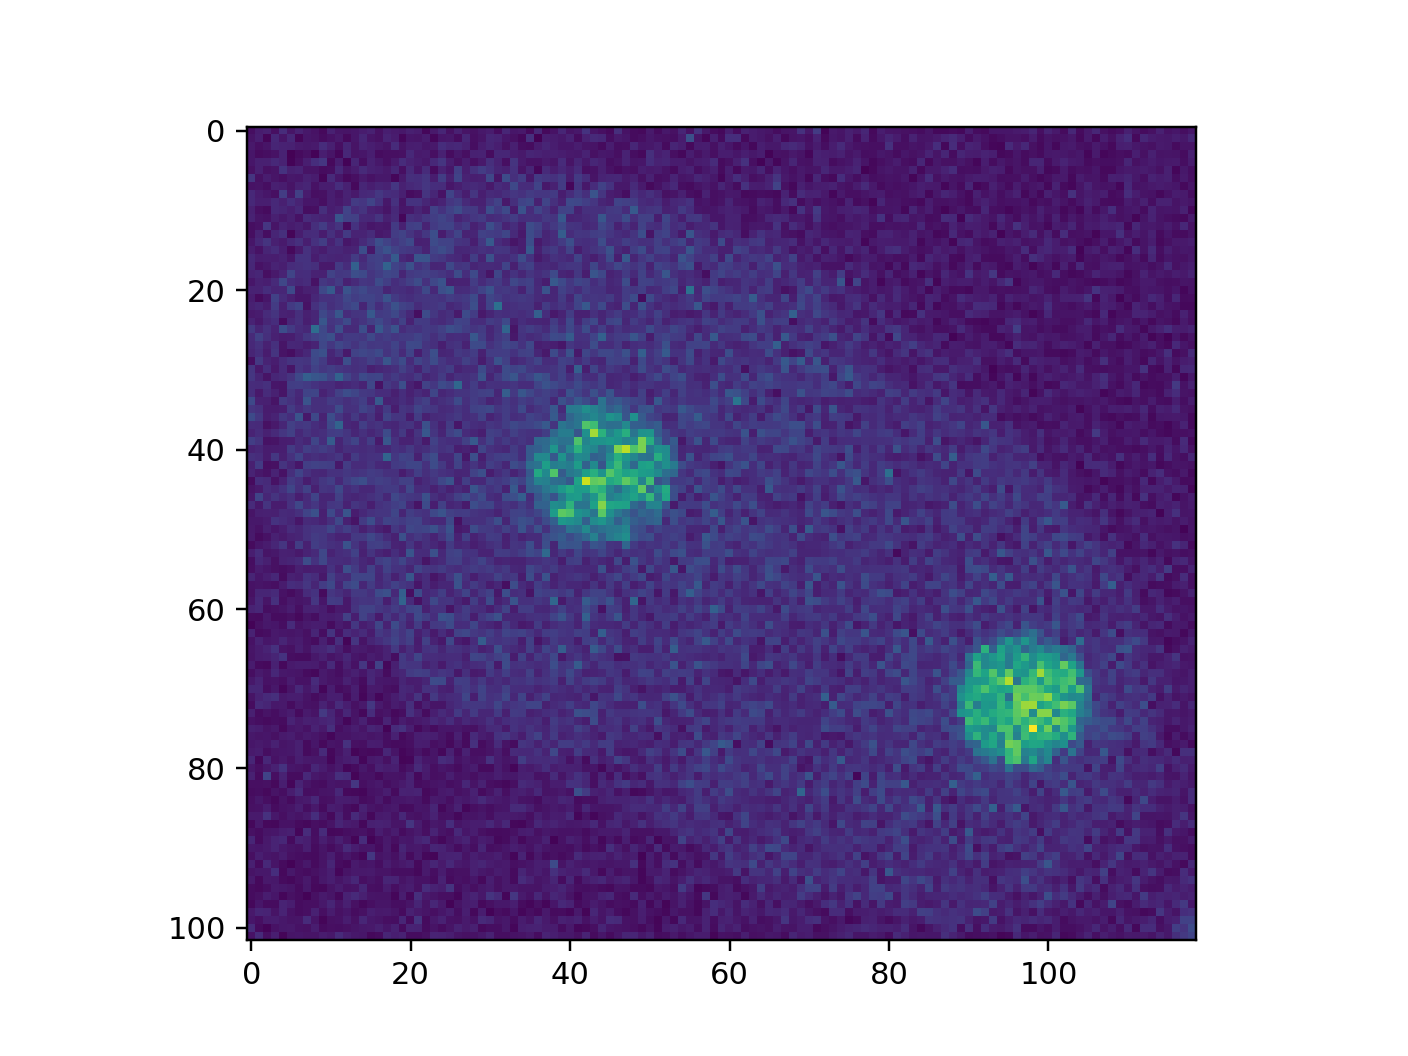

Output()

In [2]:
# test 4D画像の可視化ツール
from tifffile import imread
filename = './Sample/img.tif'
img = imread(filename)

# viewer4D(img) # 4D
# viewer4D(img[0,:,:,:]) # 3D
viewer4D(img[0,15,:,:]) # 2D
